In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


資料位置：

/content/drive/MyDrive/AI CUP/多模態病理嗓音分類競賽/Experiment/dataset/train set

In [2]:
import pandas as pd
import numpy as np

root = '/content/drive/MyDrive/AI CUP/多模態病理嗓音分類競賽'

# df_class_all = pd.read_csv(root+'/Experiment/dataset/train set/oversampling/class_all_knn7_smote.csv')
df_class_all = pd.read_csv(root+'/Experiment/dataset/train set/oversampling/class_all_knn_smote.csv')

df_class_all

,Sex,Age,Disease category,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,Onset of dysphonia,Noise at work,Occupational vocal demand,Diabetes,Hypertension,CAD,Head and Neck Cancer,Head injury,CVA,Voice handicap index - 10
0,0.000000,0.441558,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,...,0.250000,0.500000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.900000
1,1.000000,0.337662,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.600000
2,1.000000,0.207792,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,...,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.700000
3,0.000000,0.324675,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.500000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.575000
4,0.000000,0.090909,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.0,...,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.000000,0.190313,5.0,1.000000,0.122358,1.000000,1.000000,1.000000,0.0,0.0,...,0.250000,0.438821,0.040786,0.0,0.0,0.0,0.0,0.0,0.0,0.618354
2496,0.405477,0.043871,5.0,0.405477,0.000000,0.000000,0.000000,0.594523,0.0,0.0,...,0.250000,0.297262,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.135822
2497,0.000000,0.077537,5.0,1.000000,0.911785,1.000000,1.000000,1.000000,0.0,0.0,...,0.250000,0.044107,0.303928,0.0,0.0,0.0,0.0,0.0,0.0,0.736768
2498,1.000000,0.364783,5.0,0.000000,0.000000,0.029432,1.000000,0.029432,0.0,0.0,...,0.250000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.601472


## Visualize Correlation

PND                          0.005448
frequency                    0.013417
Drinking                     0.017016
Head and Neck Cancer         0.021992
Head injury                  0.028598
CVA                          0.034553
Dryness                      0.035975
Diurnal pattern              0.041841
Lumping                      0.042117
Diabetes                     0.042145
Fatigue                      0.046245
Noise at work                0.047671
CAD                          0.049188
Smoking                      0.050219
Onset of dysphonia           0.056493
Narrow pitch range           0.059393
Eye dryness                  0.059887
Voice handicap index - 10    0.062455
Hypertension                 0.066738
Occupational vocal demand    0.092815
PPD                          0.100386
Choking                      0.113733
Decreased volume             0.115613
Sex                          0.122696
heartburn                    0.134487
Age                          0.151785
dtype: float

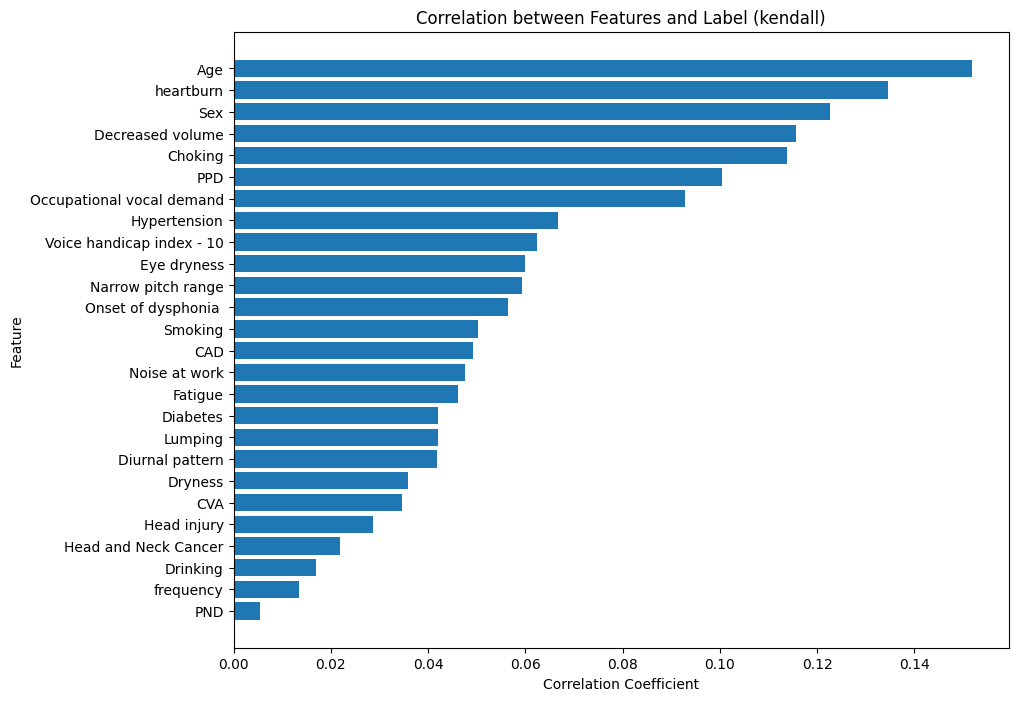

In [3]:
import matplotlib.pyplot as plt

# 計算每個特徵欄位和 label 欄位之間的相關性
df_x = df_class_all.drop(columns=['Disease category'])
df_y = df_class_all['Disease category']

corr_matrix = abs(df_x.corrwith(df_y, method='kendall')).sort_values(ascending=True)

print(corr_matrix)

# 繪製值條圖
plt.figure(figsize=(10,8))
plt.barh(corr_matrix.index, corr_matrix.values)
plt.title('Correlation between Features and Label (kendall)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

## Feature Selection

In [4]:
'''這裡先以手動方式做feature selection，自動化selection方式(selectKBest)，之後根據需求再行設計'''

# 以下為 使用Pearson correlation，取大於0.75以上的features
df_select = df_class_all[['Disease category','Age','Sex','heartburn','Occupational vocal demand','Choking','Decreased volume','PPD','Voice handicap index - 10','Eye dryness','Narrow pitch range']]
df_select


,Disease category,Age,Sex,heartburn,Occupational vocal demand,Choking,Decreased volume,PPD,Voice handicap index - 10,Eye dryness,Narrow pitch range
0,1.0,0.441558,0.000000,1.0,0.000000,0.0,1.000000,0.500000,0.900000,0.0,1.000000
1,1.0,0.337662,1.000000,0.0,0.666667,0.0,1.000000,0.000000,0.600000,0.0,0.000000
2,1.0,0.207792,1.000000,0.0,0.333333,0.0,1.000000,0.000000,0.700000,0.0,1.000000
3,1.0,0.324675,0.000000,0.0,0.333333,0.0,0.000000,0.200000,0.575000,0.0,0.000000
4,1.0,0.090909,0.000000,1.0,0.333333,0.0,0.000000,0.000000,0.470000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2495,5.0,0.190313,0.000000,0.0,0.040786,0.0,0.122358,0.000000,0.618354,0.0,1.000000
2496,5.0,0.043871,0.405477,0.0,0.333333,0.0,0.000000,0.000000,0.135822,0.0,0.405477
2497,5.0,0.077537,0.000000,0.0,0.303928,0.0,0.911785,0.000000,0.736768,0.0,1.000000
2498,5.0,0.364783,1.000000,0.0,0.333333,0.0,0.000000,0.000000,0.601472,0.0,0.000000


## Classification

準備資料train/test，不同類資料的排列組合

In [5]:
'''先準備train/test data'''

# 切分出不同class的train set
df_1 = df_select[df_select['Disease category']==1]
df_2 = df_select[df_select['Disease category']==2]
df_3 = df_select[df_select['Disease category']==3]
df_4 = df_select[df_select['Disease category']==4]
df_5 = df_select[df_select['Disease category']==5]



'''test set 還沒select features, 需選擇和train set一樣的feature
(提醒: test set資料裡面還含有ID欄位，使用時須要丟棄) '''

# 取得不同class的test set
df_1_test = pd.read_csv(root+'/Experiment/dataset/test set/class_1_knn_test.csv')
df_2_test = pd.read_csv(root+'/Experiment/dataset/test set/class_2_knn_test.csv')
df_3_test = pd.read_csv(root+'/Experiment/dataset/test set/class_3_knn_test.csv')
df_4_test = pd.read_csv(root+'/Experiment/dataset/test set/class_4_knn_test.csv')
df_5_test = pd.read_csv(root+'/Experiment/dataset/test set/class_5_knn_test.csv')

# concate成一個test set集合，然後對test set做 feature selection(注意順序必須和train set相同)
df_class_all_test = pd.concat([df_1_test,df_2_test,df_3_test,df_4_test,df_5_test], axis=0, ignore_index=True)
df_select_test = df_class_all_test[['Disease category','Age','Sex','heartburn','Occupational vocal demand','Choking','Decreased volume','PPD','Voice handicap index - 10','Eye dryness','Narrow pitch range']]

# 切分出不同class的test set
df_1_test = df_select_test[df_select_test['Disease category']==1]
df_2_test = df_select_test[df_select_test['Disease category']==2]
df_3_test = df_select_test[df_select_test['Disease category']==3]
df_4_test = df_select_test[df_select_test['Disease category']==4]
df_5_test = df_select_test[df_select_test['Disease category']==5]

df_5_test

,Disease category,Age,Sex,heartburn,Occupational vocal demand,Choking,Decreased volume,PPD,Voice handicap index - 10,Eye dryness,Narrow pitch range
195,5.0,0.181818,0.0,0.0,0.666667,0.0,0.0,0.00,0.475,0.0,0.0
196,5.0,0.038961,0.0,0.0,0.000000,0.0,0.0,0.00,0.000,0.0,0.0
197,5.0,0.116883,0.0,0.0,0.333333,0.0,1.0,0.50,0.625,0.0,1.0
198,5.0,0.155844,0.0,0.0,0.666667,0.0,0.0,0.05,0.300,0.0,0.0
199,5.0,0.012987,1.0,0.0,0.666667,0.0,1.0,0.00,0.275,0.0,0.0
200,5.0,0.155844,1.0,0.0,0.000000,0.0,1.0,0.00,0.300,1.0,1.0
201,5.0,0.064935,1.0,0.0,0.333333,0.0,0.0,0.00,0.525,0.0,0.0


In [6]:
# train set 排列組合
train12 = pd.concat([df_1,df_2], axis=0, ignore_index=True)
train13 = pd.concat([df_1,df_3], axis=0, ignore_index=True)
train14 = pd.concat([df_1,df_4], axis=0, ignore_index=True)
train15 = pd.concat([df_1,df_5], axis=0, ignore_index=True)
train23 = pd.concat([df_2,df_3], axis=0, ignore_index=True)
train24 = pd.concat([df_2,df_4], axis=0, ignore_index=True)
train25 = pd.concat([df_2,df_5], axis=0, ignore_index=True)
train34 = pd.concat([df_3,df_4], axis=0, ignore_index=True)
train35 = pd.concat([df_3,df_5], axis=0, ignore_index=True)
train45 = pd.concat([df_4,df_5], axis=0, ignore_index=True)

train12_y = train12['Disease category']
train12_x = train12.drop(columns=['Disease category'])

train13_y = train13['Disease category']
train13_x = train13.drop(columns=['Disease category'])

train14_y = train14['Disease category']
train14_x = train14.drop(columns=['Disease category'])

train15_y = train15['Disease category']
train15_x = train15.drop(columns=['Disease category'])

train23_y = train23['Disease category']
train23_x = train23.drop(columns=['Disease category'])

train24_y = train24['Disease category']
train24_x = train24.drop(columns=['Disease category'])

train25_y = train25['Disease category']
train25_x = train25.drop(columns=['Disease category'])

train34_y = train34['Disease category']
train34_x = train34.drop(columns=['Disease category'])

train35_y = train35['Disease category']
train35_x = train35.drop(columns=['Disease category'])

train45_y = train45['Disease category']
train45_x = train45.drop(columns=['Disease category'])


# test set 排列組合
test12 = pd.concat([df_1_test,df_2_test], axis=0, ignore_index=True)
test13 = pd.concat([df_1_test,df_3_test], axis=0, ignore_index=True)
test14 = pd.concat([df_1_test,df_4_test], axis=0, ignore_index=True)
test15 = pd.concat([df_1_test,df_5_test], axis=0, ignore_index=True)
test23 = pd.concat([df_2_test,df_3_test], axis=0, ignore_index=True)
test24 = pd.concat([df_2_test,df_4_test], axis=0, ignore_index=True)
test25 = pd.concat([df_2_test,df_5_test], axis=0, ignore_index=True)
test34 = pd.concat([df_3_test,df_4_test], axis=0, ignore_index=True)
test35 = pd.concat([df_3_test,df_5_test], axis=0, ignore_index=True)
test45 = pd.concat([df_4_test,df_5_test], axis=0, ignore_index=True)

test12_y = test12['Disease category']
test12_x = test12.drop(columns=['Disease category'])

test13_y = test13['Disease category']
test13_x = test13.drop(columns=['Disease category'])

test14_y = test14['Disease category']
test14_x = test14.drop(columns=['Disease category'])

test15_y = test15['Disease category']
test15_x = test15.drop(columns=['Disease category'])

test23_y = test23['Disease category']
test23_x = test23.drop(columns=['Disease category'])

test24_y = test24['Disease category']
test24_x = test24.drop(columns=['Disease category'])

test25_y = test25['Disease category']
test25_x = test25.drop(columns=['Disease category'])

test34_y = test34['Disease category']
test34_x = test34.drop(columns=['Disease category'])

test35_y = test35['Disease category']
test35_x = test35.drop(columns=['Disease category'])

test45_y = test45['Disease category']
test45_x = test45.drop(columns=['Disease category'])

# 總測試資料集
test_all = pd.concat([df_1_test,df_2_test,df_3_test,df_4_test,df_5_test], axis=0, ignore_index=True)

test_all_y = test_all['Disease category']
test_all_x = test_all.drop(columns=['Disease category'])

# 輸出總測試資料集
# test_all.to_csv(root+'dataset/test set/test_all.csv')

### 開始建構分類器

In [7]:
!pip install catboost
!pip install imbalanced-ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 11.9 MB/s eta 0:00:00


訓練

In [9]:
def s(X_train,y_train):
  # https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-create-a-multilabel-svm-classifier-with-scikit-learn.md
  from sklearn.svm import SVC
  svm=SVC(probability=True)
  svm.fit(X_train, y_train)
  return svm

def n(X_train,y_train):
  from sklearn.naive_bayes import GaussianNB
  nb = GaussianNB()
  nb.fit(X_train,y_train)
  return nb

def r(X_train,y_train):
  from sklearn import ensemble
  forest = ensemble.RandomForestClassifier(n_estimators = 100)
  forest.fit(X_train,y_train)
  return forest

def l(X_train,y_train):
  from sklearn.linear_model  import LogisticRegression
  # lr=LogisticRegression()
  lr=LogisticRegression(penalty='l1', solver='liblinear')
  lr.fit(X_train,y_train)
  return lr

def df(X_train,y_train):
  from sklearn import tree
  DecisionTree = tree.DecisionTreeClassifier()
  DecisionTree.fit(X_train,y_train)
  return DecisionTree

def g(X_train,y_train):
  # https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  y_train = le.fit_transform(y_train)
  from sklearn import metrics
  from xgboost.sklearn import XGBClassifier
  XGB = XGBClassifier()
  XGB.fit(X_train,y_train)
  return XGB

def cb(X_train,y_train):
  from catboost import CatBoostClassifier
  CAT = CatBoostClassifier()
  CAT.fit(X_train,y_train, verbose=0, plot=True)
  return CAT
  
def cnb(X_train,y_train):
  from sklearn.naive_bayes import ComplementNB
  CNB = ComplementNB(force_alpha=True)
  CNB.fit(X_train,y_train)
  return CNB
  # train12_x,train12_y,train13_x,train13_y,train14_x,train14_y,train15_x,train15_y,train23_x,train23_y,train24_x,train24_y,train25_x,train25_y,train34_x,train34_y,train35_x,train35_y,train45_x,train45_y

def knn(X_train,y_train):
  from sklearn.neighbors import KNeighborsClassifier
  KNN = KNeighborsClassifier()
  KNN.fit(X_train,y_train)
  return KNN

def smoteb(X_train,y_train):
  from imbens.ensemble import SMOTEBoostClassifier
  SMB=SMOTEBoostClassifier()
  SMB.fit(X_train,y_train)
  return SMB

def ru(X_train,y_train):
  from imblearn.ensemble import RUSBoostClassifier
  RUSB=RUSBoostClassifier()
  RUSB.fit(X_train,y_train)
  return RUSB

def ros_bag(X_train,y_train):
  from imblearn.over_sampling import RandomOverSampler
  from imblearn.ensemble import BalancedBaggingClassifier
  ROS_BAG=BalancedBaggingClassifier(sampler=RandomOverSampler())
  ROS_BAG.fit(X_train,y_train)
  return ROS_BAG

def svc_bag(X_train,y_train):
  from sklearn.svm import SVC
  from imblearn.ensemble import BalancedBaggingClassifier
  SBAG=BalancedBaggingClassifier(estimator=SVC())
  SBAG.fit(X_train,y_train)
  return SBAG

def svc_b_bag(X_train,y_train):
  from sklearn.svm import SVC
  from sklearn.ensemble import BaggingClassifier
  SBBAG=BaggingClassifier(estimator=SVC())
  SBBAG.fit(X_train,y_train)
  return SBBAG


def svc_stack(X_train,y_train):
  from sklearn.svm import SVC
  from sklearn.ensemble import StackingClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import LinearSVC
  from sklearn.preprocessing import StandardScaler
  from sklearn.pipeline import make_pipeline
  estimators = [
      ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
      ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
  ]
  SS=StackingClassifier(estimators=estimators, final_estimator=SVC())
  SS.fit(X_train,y_train)
  return SS

def stackCV(X_train,y_train):
  # https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/
  import six
  import sys
  sys.modules['sklearn.externals.six'] = six
  from mlxtend.classifier import StackingCVClassifier
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB 
  from sklearn.ensemble import RandomForestClassifier
  RANDOM_SEED = 42
  clf1 = KNeighborsClassifier(n_neighbors=1)
  clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
  clf3 = GaussianNB()
  lr = LogisticRegression()
  SSCV=StackingCVClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)
  SSCV.fit(X_train,y_train)
  return SSCV

def l_svr(X_train,y_train):
  from sklearn import svm
  # https://ithelp.ithome.com.tw/articles/10270447
  # kernel='linear' (線性)
  # kernel='poly' (非線性)
  # kernel='rbf' (非線性)
  # C: 限制模型的複雜度，防止過度擬合
  linearModel=svm.SVR(C=1, kernel='linear')
  # 使用訓練資料訓練模型
  linearModel.fit(X_train,y_train)
  return linearModel

def p_svr(X_train,y_train):
  from sklearn import svm
  # https://ithelp.ithome.com.tw/articles/10270447
  # kernel='linear' (線性)
  # kernel='poly' (非線性)
  # kernel='rbf' (非線性)
  # C: 限制模型的複雜度，防止過度擬合
  linearModel=svm.SVR(C=6, kernel='poly')
  # 使用訓練資料訓練模型
  linearModel.fit(X_train,y_train)
  return linearModel
def mnb(X_train,y_train):
  from sklearn.naive_bayes import MultinomialNB
  MNB=MultinomialNB()
  MNB.fit(X_train,y_train)
  return MNB
def bnb(X_train,y_train): # 不適用多類別
  from sklearn.naive_bayes import BernoulliNB
  BNB=BernoulliNB()
  BNB.fit(X_train,y_train)
  return BNB

預測結果

In [10]:
from sqlalchemy.engine import result
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score

def clf_ovo(test_df,clf12,clf13,clf14,clf15,clf23,clf24,clf25,clf34,clf35,clf45):
  '''此函式輸出兩個東西
  1. 給定資料集的預測結果集合(np.array)---> df_voting[0].values
  2. 每個分類器的預測結果集合(dict)---> predict_result
   '''
  
  predict_result = {}  #每個分類器的預測結果
  
  # 每個分類器預測結果
  predict_result['clf12'] = clf12.predict(test_df)
  predict_result['clf13'] = clf13.predict(test_df)
  predict_result['clf14'] = clf14.predict(test_df)
  predict_result['clf15'] = clf15.predict(test_df)
  predict_result['clf23'] = clf23.predict(test_df)
  predict_result['clf24'] = clf24.predict(test_df)
  predict_result['clf25'] = clf25.predict(test_df)
  predict_result['clf34'] = clf34.predict(test_df)
  predict_result['clf35'] = clf35.predict(test_df)
  predict_result['clf45'] = clf45.predict(test_df)
  
  return output_result(predict_result)
  

In [11]:
def output_result(predict_result):
  # 將結果輸出為DataFrame
  df_result_all = pd.DataFrame(predict_result)
  # display(df_result_all)

  # Voting 所有分類器的結果
  df_voting = df_result_all.mode(axis=1)
  display(df_voting)
  
  return df_voting[0].values, predict_result

In [12]:
def evaluate_all_classifier(predict_result, true_result,clf_name):
  ''' predict_result is a dict, the value of keys are list.
   true_result is a list'''

  #輸出每個分類器的準確度
  print('Accuracy of '+clf_name+'12: ', accuracy_score(true_result, predict_result['clf12']))
  print('Accuracy of '+clf_name+'13: ', accuracy_score(true_result, predict_result['clf13']))
  print('Accuracy of '+clf_name+'14: ', accuracy_score(true_result, predict_result['clf14']))
  print('Accuracy of '+clf_name+'15: ', accuracy_score(true_result, predict_result['clf15']))
  print('Accuracy of '+clf_name+'23: ', accuracy_score(true_result, predict_result['clf23']))
  print('Accuracy of '+clf_name+'24: ', accuracy_score(true_result, predict_result['clf24']))
  print('Accuracy of '+clf_name+'25: ', accuracy_score(true_result, predict_result['clf25']))
  print('Accuracy of '+clf_name+'34: ', accuracy_score(true_result, predict_result['clf34']))
  print('Accuracy of '+clf_name+'35: ', accuracy_score(true_result, predict_result['clf35']))
  print('Accuracy of '+clf_name+'45: ', accuracy_score(true_result, predict_result['clf45']))
  print(' ')

  #輸出每個分類器的MCC
  print('MCC of '+clf_name+'12: ', matthews_corrcoef(true_result, predict_result['clf12']))
  print('MCC of '+clf_name+'13: ', matthews_corrcoef(true_result, predict_result['clf13']))
  print('MCC of '+clf_name+'14: ', matthews_corrcoef(true_result, predict_result['clf14']))
  print('MCC of '+clf_name+'15: ', matthews_corrcoef(true_result, predict_result['clf15']))
  print('MCC of '+clf_name+'23: ', matthews_corrcoef(true_result, predict_result['clf23']))
  print('MCC of '+clf_name+'24: ', matthews_corrcoef(true_result, predict_result['clf24']))
  print('MCC of '+clf_name+'25: ', matthews_corrcoef(true_result, predict_result['clf25']))
  print('MCC of '+clf_name+'34: ', matthews_corrcoef(true_result, predict_result['clf34']))
  print('MCC of '+clf_name+'35: ', matthews_corrcoef(true_result, predict_result['clf35']))
  print('MCC of '+clf_name+'45: ', matthews_corrcoef(true_result, predict_result['clf45']))
  print(' ')

  #輸出每個分類器的Recall
  print('Recall of '+clf_name+'12: ', recall_score(true_result, predict_result['clf12'], average='macro'))
  print('Recall of '+clf_name+'13: ', recall_score(true_result, predict_result['clf13'], average='macro'))
  print('Recall of '+clf_name+'14: ', recall_score(true_result, predict_result['clf14'], average='macro'))
  print('Recall of '+clf_name+'15: ', recall_score(true_result, predict_result['clf15'], average='macro'))
  print('Recall of '+clf_name+'23: ', recall_score(true_result, predict_result['clf23'], average='macro'))
  print('Recall of '+clf_name+'24: ', recall_score(true_result, predict_result['clf24'], average='macro'))
  print('Recall of '+clf_name+'25: ', recall_score(true_result, predict_result['clf25'], average='macro'))
  print('Recall of '+clf_name+'34: ', recall_score(true_result, predict_result['clf34'], average='macro'))
  print('Recall of '+clf_name+'35: ', recall_score(true_result, predict_result['clf35'], average='macro'))
  print('Recall of '+clf_name+'45: ', recall_score(true_result, predict_result['clf45'], average='macro'))
  print(' ')
  

In [13]:
def acc_all_classifier(predict_result, true_result,clf_name):
  ''' predict_result is a dict, the value of keys are list.
   true_result is a list'''

  #輸出每個分類器的準確度
  acc12,acc13,acc14,acc15,acc23,acc24,acc25,acc34,acc35,acc45=[],[],[],[],[],[],[],[],[],[]
  
  acc12.append(accuracy_score(true_result, predict_result['clf12']))
  acc13.append(accuracy_score(true_result, predict_result['clf13']))
  acc14.append(accuracy_score(true_result, predict_result['clf14']))
  acc15.append(accuracy_score(true_result, predict_result['clf15']))
  acc23.append(accuracy_score(true_result, predict_result['clf23']))
  acc24.append(accuracy_score(true_result, predict_result['clf24']))
  acc25.append(accuracy_score(true_result, predict_result['clf25']))
  acc34.append(accuracy_score(true_result, predict_result['clf34']))
  acc35.append(accuracy_score(true_result, predict_result['clf35']))
  acc45.append(accuracy_score(true_result, predict_result['clf45']))
  
  return [acc12,acc13,acc14,acc15,acc23,acc24,acc25,acc34,acc35,acc45]

#### 模型

In [ ]:
from sqlalchemy.engine import result
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score

def clf_ovo(test_df,clf12,clf13,clf14,clf15,clf23,clf24,clf25,clf34,clf35,clf45):
  '''此函式輸出兩個東西
  1. 給定資料集的預測結果集合(np.array)---> df_voting[0].values
  2. 每個分類器的預測結果集合(dict)---> predict_result
   '''
  
  predict_result = {}  #每個分類器的預測結果
  
  # 每個分類器預測結果
  predict_result['clf12'] = clf12.predict(test_df)
  predict_result['clf13'] = clf13.predict(test_df)
  predict_result['clf14'] = clf14.predict(test_df)
  predict_result['clf15'] = clf15.predict(test_df)
  predict_result['clf23'] = clf23.predict(test_df)
  predict_result['clf24'] = clf24.predict(test_df)
  predict_result['clf25'] = clf25.predict(test_df)
  predict_result['clf34'] = clf34.predict(test_df)
  predict_result['clf35'] = clf35.predict(test_df)
  predict_result['clf45'] = clf45.predict(test_df)
  
  return predict_result
  

In [14]:
def clf_model_combination(test_df,clf,clf_name,test_y):
  clf12=clf(train12_x, train12_y)
  clf13=clf(train13_x, train13_y)
  clf14=clf(train14_x, train14_y)
  clf15=clf(train15_x, train15_y)
  clf23=clf(train23_x, train23_y)
  clf24=clf(train24_x, train24_y)
  clf25=clf(train25_x, train25_y)
  clf34=clf(train34_x, train34_y)
  clf35=clf(train35_x, train35_y)
  clf45=clf(train45_x, train45_y)
  classifier_result = clf_ovo(test_df,clf12,clf13,clf14,clf15,clf23,clf24,clf25,clf34,clf35,clf45)
  return classifier_result
  print('Accuracy of All result: ', accuracy_score(test_y, voting_result))
  print('MCC of All result: ', matthews_corrcoef(test_y, voting_result))
  print('Recall of All result: ', recall_score(test_y, voting_result, average='macro'))

In [ ]:
def compare_list(pred):
  pred_list=[]
  clf12,clf13,clf14,clf15,clf23,clf24,clf25,clf34,clf35,clf145=[],[],[],[],[],[],[],[],[],[]
  for model in pred:
    clf12.append(model['clf12'])
    clf13.append(model['clf13'])
    clf14.append(model['clf14'])
    clf15.append(model['clf15'])
    clf23.append(model['clf23'])
    clf24.append(model['clf24'])
    clf25.append(model['clf25'])
    clf34.append(model['clf34'])
    clf35.append(model['clf35'])
    clf45.append(model['clf45'])
  # # 將結果輸出為DataFrame
  # df_result_all = pd.DataFrame(predict_result)
  # # display(df_result_all)

  # # Voting 所有分類器的結果
  # df_voting = df_result_all.mode(axis=1)
  # display(df_voting)

  

In [16]:
from itertools import permutations
print(list(permutations(range(0,9))))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def result_compare(test_df,test_y):
  model_list=['SVM','NB','RF','LR','DF','X','CAT','CNB','KNN','SM','RU','ROS','MNB','BNB','SVCB','SC']
  pred=[]
  pred.append(clf_model_combination(test_df,s,'SVM',test_y))
  pred.append(clf_model_combination(test_df,n,'NB',test_y))
  pred.append(clf_model_combination(test_df,r,'RF',test_y)) # GaussianNB
  pred.append(clf_model_combination(test_df,l,'LR',test_y))
  pred.append(clf_model_combination(test_df,df,'DecisionTree',test_y))
  pred.append(clf_model_combination(test_df,g,'XGBClassifier',test_y))
  pred.append(clf_model_combination(test_df,cb,'catboostClassifier',test_y))
  pred.append(clf_model_combination(test_df,cnb,'CNB',test_y))
  pred.append(clf_model_combination(test_df,knn,'KNN',test_y))
  pred.append(clf_model_combination(test_df,smoteb,'SMOTEBoostClassifier',test_y))
  pred.append(clf_model_combination(test_df,ru,'RUSBoostClassifier',test_y))
  pred.append(clf_model_combination(test_df,ros_bag,'RandomOverSampler+BalancedBaggingClassifier',test_y))
  pred.append(clf_model_combination(test_df,mnb,'MultinomialNB',test_y))
  pred.append(clf_model_combination(test_df,bnb,'BernoulliNB',test_y))
  # ---
  pred.append(clf_model_combination(test_df,svc_bag,'SVC+BaggingClassifier',test_y))
  pred.append(clf_model_combination(test_df,svc_b_bag,'SVC+BalancedBaggingClassifier',test_y))
  # clf_model(test_df,stackCV,'stackCVClassifier',test_y) # X
  pred.append(clf_model_combination(test_df,svc_stack,'stackingClassifier',test_y))
  # clf_model(test_df,l_svr,'SVR_linear',test_y) # X
  # clf_model(test_df,p_svr,'SVR_poly',test_y) # X
  

In [ ]:
def output_voting_result(predict_result):
  # 將結果輸出為DataFrame
  df_result_all = pd.DataFrame(predict_result)
  # display(df_result_all)

  # Voting 所有分類器的結果
  df_voting = df_result_all.mode(axis=1)
  display(df_voting)
  
  return df_voting[0].values, predict_result

In [ ]:
def clf_model(test_df,clf,clf_name,test_y):
  clf12=clf(train12_x, train12_y)
  clf13=clf(train13_x, train13_y)
  clf14=clf(train14_x, train14_y)
  clf15=clf(train15_x, train15_y)
  clf23=clf(train23_x, train23_y)
  clf24=clf(train24_x, train24_y)
  clf25=clf(train25_x, train25_y)
  clf34=clf(train34_x, train34_y)
  clf35=clf(train35_x, train35_y)
  clf45=clf(train45_x, train45_y)
  voting_result, classifier_result = clf_ovo(test_df,clf12,clf13,clf14,clf15,clf23,clf24,clf25,clf34,clf35,clf45)
  
  acc_all=acc_all_classifier(predict_result=classifier_result, true_result=test_y,clf_name=clf_name)
  return acc_all

In [ ]:
def compare_model(pred_acc):
  best_acc=[]
  for acc in pred_acc:
    best_acc.append(acc.index(max(acc)))
  return best_acc

In [ ]:
def result_combine(test_df,test_y):
  best_clf_model(test_df,test_y)

In [ ]:
def result_compare(test_df,test_y):
  model_list=['SVM','NB','RF','LR','DF','X','CAT','CNB','KNN','SM','RU','ROS','MNB','BNB','SVCB','SC']
  pred=[]
  pred.append(clf_model(test_df,s,'SVM',test_y))
  pred.append(clf_model(test_df,n,'NB',test_y))
  pred.append(clf_model(test_df,r,'RF',test_y)) # GaussianNB
  pred.append(clf_model(test_df,l,'LR',test_y))
  pred.append(clf_model(test_df,df,'DecisionTree',test_y))
  pred.append(clf_model(test_df,g,'XGBClassifier',test_y))
  pred.append(clf_model(test_df,cb,'catboostClassifier',test_y))
  pred.append(clf_model(test_df,cnb,'CNB',test_y))
  pred.append(clf_model(test_df,knn,'KNN',test_y))
  pred.append(clf_model(test_df,smoteb,'SMOTEBoostClassifier',test_y))
  pred.append(clf_model(test_df,ru,'RUSBoostClassifier',test_y))
  pred.append(clf_model(test_df,ros_bag,'RandomOverSampler+BalancedBaggingClassifier',test_y))
  pred.append(clf_model(test_df,mnb,'MultinomialNB',test_y))
  pred.append(clf_model(test_df,bnb,'BernoulliNB',test_y))
  # ---
  pred.append(clf_model(test_df,svc_bag,'SVC+BaggingClassifier',test_y))
  pred.append(clf_model(test_df,svc_b_bag,'SVC+BalancedBaggingClassifier',test_y))
  # clf_model(test_df,stackCV,'stackCVClassifier',test_y) # X
  pred.append(clf_model(test_df,svc_stack,'stackingClassifier',test_y))
  # clf_model(test_df,l_svr,'SVR_linear',test_y) # X
  # clf_model(test_df,p_svr,'SVR_poly',test_y) # X
  best_acc=compare_model(pred)
  print('best acc12:',model_list[best_acc[0]])
  print('best acc13:',model_list[best_acc[1]])
  print('best acc14:',model_list[best_acc[2]])
  print('best acc15:',model_list[best_acc[3]])
  print('best acc23:',model_list[best_acc[4]])
  print('best acc24:',model_list[best_acc[5]])
  print('best acc25:',model_list[best_acc[6]])
  print('best acc34:',model_list[best_acc[7]])
  print('best acc35:',model_list[best_acc[8]])
  print('best acc45:',model_list[best_acc[9]])

In [ ]:
# best acc12: NB
# best acc13: NB
# best acc14: NB
# best acc15: NB
# best acc23: NB
# best acc24: SM
# best acc25: SVM
# best acc34: NB
# best acc35: NB
# best acc45: NB

def best_clf_model(test_df,test_y):
  clf12=n(train12_x, train12_y)
  clf13=n(train13_x, train13_y)
  clf14=n(train14_x, train14_y)
  clf15=n(train15_x, train15_y)
  clf23=n(train23_x, train23_y)
  clf24=smoteb(train24_x, train24_y)
  clf25=s(train25_x, train25_y)
  clf34=n(train34_x, train34_y)
  clf35=n(train35_x, train35_y)
  clf45=n(train45_x, train45_y)
  voting_result, classifier_result = clf_ovo(test_df,clf12,clf13,clf14,clf15,clf23,clf24,clf25,clf34,clf35,clf45)
  
  evaluate_all_classifier(predict_result=classifier_result, true_result=test_y,clf_name='NB+SMOTE+SVM')
  # return acc_all
  print('Accuracy of All result: ', accuracy_score(test_y, voting_result))
  print('MCC of All result: ', matthews_corrcoef(test_y, voting_result))
  print('Recall of All result: ', recall_score(test_y, voting_result, average='macro'))

In [ ]:
def result(test_df,test_y):
  clf_model(test_df,s,'SVM',test_y)
  clf_model(test_df,n,'NB',test_y)
  clf_model(test_df,r,'RF',test_y) # GaussianNB
  clf_model(test_df,l,'LR',test_y)
  clf_model(test_df,df,'DecisionTree',test_y)
  clf_model(test_df,g,'XGBClassifier',test_y)
  clf_model(test_df,cb,'catboostClassifier',test_y)
  clf_model(test_df,cnb,'CNB',test_y)
  clf_model(test_df,knn,'KNN',test_y)
  clf_model(test_df,smoteb,'SMOTEBoostClassifier',test_y)
  clf_model(test_df,ru,'RUSBoostClassifier',test_y)
  clf_model(test_df,ros_bag,'RandomOverSampler+BalancedBaggingClassifier',test_y)
  clf_model(test_df,mnb,'MultinomialNB',test_y)
  clf_model(test_df,bnb,'BernoulliNB',test_y)
  # ---
  clf_model(test_df,svc_bag,'SVC+BaggingClassifier',test_y)
  clf_model(test_df,svc_b_bag,'SVC+BalancedBaggingClassifier',test_y)
  # clf_model(test_df,stackCV,'stackCVClassifier',test_y) # X
  clf_model(test_df,svc_stack,'stackingClassifier',test_y)
  # clf_model(test_df,l_svr,'SVR_linear',test_y) # X
  # clf_model(test_df,p_svr,'SVR_poly',test_y) # X
  

In [ ]:
# result(test_all_x,test_all_y)

In [ ]:
# 總測試資料集
test_all = pd.read_csv(root+'/Experiment/dataset/test_all/test_all.csv')

test_all_y = test_all['Disease category']
test_all_x = test_all.drop(columns=['Unnamed: 0','Disease category'])

In [ ]:
result_combine(test_all_x,test_all_y)

,0,1,2
0,5.0,NaN,NaN
1,5.0,NaN,NaN
2,3.0,NaN,NaN
3,1.0,2.0,5.0
4,1.0,NaN,NaN
...,...,...,...
197,4.0,NaN,NaN
198,5.0,NaN,NaN
199,2.0,NaN,NaN
200,1.0,NaN,NaN


Accuracy of NB+SMOTE+SVM12:  0.4801980198019802
Accuracy of NB+SMOTE+SVM13:  0.5396039603960396
Accuracy of NB+SMOTE+SVM14:  0.41089108910891087
Accuracy of NB+SMOTE+SVM15:  0.3217821782178218
Accuracy of NB+SMOTE+SVM23:  0.30198019801980197
Accuracy of NB+SMOTE+SVM24:  0.21782178217821782
Accuracy of NB+SMOTE+SVM25:  0.20297029702970298
Accuracy of NB+SMOTE+SVM34:  0.15346534653465346
Accuracy of NB+SMOTE+SVM35:  0.1782178217821782
Accuracy of NB+SMOTE+SVM45:  0.054455445544554455
 
MCC of NB+SMOTE+SVM12:  0.24834777987334605
MCC of NB+SMOTE+SVM13:  0.306063838827381
MCC of NB+SMOTE+SVM14:  0.11933355242728096
MCC of NB+SMOTE+SVM15:  0.01767402066546281
MCC of NB+SMOTE+SVM23:  0.18820972821900686
MCC of NB+SMOTE+SVM24:  0.07037656901195531
MCC of NB+SMOTE+SVM25:  0.08373334885474853
MCC of NB+SMOTE+SVM34:  0.07293876583436418
MCC of NB+SMOTE+SVM35:  0.1293423554216555
MCC of NB+SMOTE+SVM45:  0.02567268719407989
 
Recall of NB+SMOTE+SVM12:  0.2765993265993266
Recall of NB+SMOTE+SVM13: 

In [ ]:
# 1.SVM
# 2.Random forest
# 3.decision tree


In [ ]:
# result_compare(test_all_x,test_all_y)

,0,1,2
0,5.0,NaN,NaN
1,5.0,NaN,NaN
2,2.0,NaN,NaN
3,1.0,NaN,NaN
4,1.0,NaN,NaN
...,...,...,...
197,4.0,NaN,NaN
198,5.0,NaN,NaN
199,2.0,NaN,NaN
200,1.0,NaN,NaN


,0
0,5.0
1,5.0
2,3.0
3,5.0
4,1.0
...,...
197,4.0
198,5.0
199,5.0
200,1.0


,0,1,2
0,5.0,NaN,NaN
1,1.0,NaN,NaN
2,1.0,NaN,NaN
3,1.0,NaN,NaN
4,3.0,NaN,NaN
...,...,...,...
197,1.0,NaN,NaN
198,1.0,NaN,NaN
199,2.0,NaN,NaN
200,1.0,NaN,NaN


,0,1,2
0,5.0,NaN,NaN
1,5.0,NaN,NaN
2,3.0,NaN,NaN
3,5.0,NaN,NaN
4,1.0,NaN,NaN
...,...,...,...
197,4.0,NaN,NaN
198,5.0,NaN,NaN
199,5.0,NaN,NaN
200,1.0,NaN,NaN


,0,1,2
0,1.0,NaN,NaN
1,1.0,NaN,NaN
2,1.0,NaN,NaN
3,1.0,NaN,NaN
4,3.0,NaN,NaN
...,...,...,...
197,1.0,NaN,NaN
198,1.0,5.0,NaN
199,1.0,NaN,NaN
200,1.0,NaN,NaN


,0,1
0,0.0,1.0
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
197,0.0,1.0
198,0.0,NaN
199,0.0,NaN
200,0.0,NaN


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

,0,1,2
0,5.0,NaN,NaN
1,1.0,NaN,NaN
2,3.0,NaN,NaN
3,1.0,NaN,NaN
4,3.0,NaN,NaN
...,...,...,...
197,1.0,NaN,NaN
198,1.0,NaN,NaN
199,2.0,NaN,NaN
200,1.0,NaN,NaN


,0
0,5.0
1,5.0
2,3.0
3,1.0
4,1.0
...,...
197,4.0
198,4.0
199,3.0
200,1.0


,0
0,5.0
1,1.0
2,2.0
3,1.0
4,3.0
...,...
197,1.0
198,5.0
199,2.0
200,1.0


,0,1,2
0,1.0,NaN,NaN
1,1.0,NaN,NaN
2,3.0,NaN,NaN
3,1.0,NaN,NaN
4,1.0,NaN,NaN
...,...,...,...
197,4.0,NaN,NaN
198,5.0,NaN,NaN
199,1.0,2.0,5.0
200,1.0,NaN,NaN


,0,1,2
0,1.0,NaN,NaN
1,1.0,NaN,NaN
2,3.0,NaN,NaN
3,1.0,NaN,NaN
4,1.0,NaN,NaN
...,...,...,...
197,4.0,NaN,NaN
198,5.0,NaN,NaN
199,1.0,2.0,5.0
200,1.0,NaN,NaN


,0,1,2
0,1.0,NaN,NaN
1,1.0,NaN,NaN
2,1.0,NaN,NaN
3,1.0,NaN,NaN
4,3.0,NaN,NaN
...,...,...,...
197,1.0,NaN,NaN
198,1.0,NaN,NaN
199,2.0,NaN,NaN
200,1.0,NaN,NaN


,0
0,5.0
1,5.0
2,3.0
3,1.0
4,1.0
...,...
197,4.0
198,4.0
199,3.0
200,1.0


,0
0,5.0
1,5.0
2,3.0
3,1.0
4,3.0
...,...
197,4.0
198,4.0
199,3.0
200,1.0


,0,1
0,5.0,NaN
1,1.0,NaN
2,2.0,NaN
3,1.0,NaN
4,1.0,NaN
...,...,...
197,4.0,NaN
198,5.0,NaN
199,2.0,NaN
200,1.0,NaN


,0,1,2
0,5.0,NaN,NaN
1,1.0,NaN,NaN
2,2.0,NaN,NaN
3,1.0,NaN,NaN
4,1.0,NaN,NaN
...,...,...,...
197,4.0,NaN,NaN
198,5.0,NaN,NaN
199,2.0,NaN,NaN
200,1.0,NaN,NaN


,0,1,2
0,5.0,NaN,NaN
1,1.0,NaN,NaN
2,3.0,NaN,NaN
3,1.0,NaN,NaN
4,1.0,NaN,NaN
...,...,...,...
197,1.0,NaN,NaN
198,2.0,NaN,NaN
199,2.0,NaN,NaN
200,1.0,NaN,NaN


best acc12: NB
best acc13: NB
best acc14: NB
best acc15: NB
best acc23: NB
best acc24: SM
best acc25: SVM
best acc34: NB
best acc35: NB
best acc45: NB


## Run test

In [ ]:
def clf_model_test(test_df,clf,clf_name,test_y):
  clf12=clf(train12_x, train12_y)
  clf13=clf(train13_x, train13_y)
  clf14=clf(train14_x, train14_y)
  clf15=clf(train15_x, train15_y)
  clf23=clf(train23_x, train23_y)
  clf24=clf(train24_x, train24_y)
  clf25=clf(train25_x, train25_y)
  clf34=clf(train34_x, train34_y)
  clf35=clf(train35_x, train35_y)
  clf45=clf(train45_x, train45_y)
  voting_result, classifier_result = clf_ovo(test_df,clf12,clf13,clf14,clf15,clf23,clf24,clf25,clf34,clf35,clf45)
  return voting_result, classifier_result

In [ ]:
df_AIcup_test = pd.read_csv(root+'/Experiment/dataset/AI cup_test/test_datalist_public.csv')
df_AIcup_test

,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,Onset of dysphonia,Noise at work,Occupational vocal demand,Diabetes,Hypertension,CAD,Head and Neck Cancer,Head injury,CVA,Voice handicap index - 10
0,1301skj,2,27,0,1,1,1,1,0,0,...,2,3,1,0,0,0,0,0,0,30.0
1,1100j0u,1,50,0,0,0,0,0,0,0,...,1,2,2,0,1,0,0,0,0,30.0
2,0G00r5c,1,41,1,1,0,0,0,0,0,...,5,2,3,0,0,0,0,0,0,29.0
3,1202v5m,2,48,1,0,0,1,1,0,0,...,2,1,4,0,0,0,0,0,0,5.0
4,0C01365,2,43,0,1,0,1,0,1,1,...,1,2,1,0,0,1,0,0,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0C0147g,2,39,1,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,30.0
496,13021ib,2,58,0,0,1,1,0,1,0,...,2,3,1,0,0,0,0,0,0,30.0
497,110049h,1,72,0,1,1,0,0,0,0,...,3,1,3,0,1,0,0,0,0,32.0
498,0T01khc,2,60,1,0,0,0,1,0,0,...,2,2,4,0,0,0,1,0,0,3.0


In [ ]:
df_AIcup_test.isna().sum()

ID                             0
Sex                            0
Age                            0
Narrow pitch range             0
Decreased volume               0
Fatigue                        0
Dryness                        0
Lumping                        0
heartburn                      0
Choking                        0
Eye dryness                    0
PND                            0
Smoking                        0
PPD                          404
Drinking                       0
frequency                      0
Diurnal pattern                0
Onset of dysphonia             0
Noise at work                  0
Occupational vocal demand      0
Diabetes                       0
Hypertension                   0
CAD                            0
Head and Neck Cancer           0
Head injury                    0
CVA                            0
Voice handicap index - 10      2
dtype: int64

In [ ]:
df_AIcup_test.dtypes

ID                            object
Sex                            int64
Age                            int64
Narrow pitch range             int64
Decreased volume               int64
Fatigue                        int64
Dryness                        int64
Lumping                        int64
heartburn                      int64
Choking                        int64
Eye dryness                    int64
PND                            int64
Smoking                        int64
PPD                          float64
Drinking                       int64
frequency                      int64
Diurnal pattern                int64
Onset of dysphonia             int64
Noise at work                  int64
Occupational vocal demand      int64
Diabetes                       int64
Hypertension                   int64
CAD                            int64
Head and Neck Cancer           int64
Head injury                    int64
CVA                            int64
Voice handicap index - 10    float64
d

In [ ]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import impyute as impy

def using_test(df, filename, clf, clf_name):
  # 先做test 前處理
  df['Sex'].astype(int)

  # Data transform(one-hot)
  df['Sex'] = df['Sex'].replace({1:0,2:1})   # sex one-hot
  df['Noise at work'] = df['Noise at work']-1   # 0表示沒有，其餘依程度表示

  df['PPD'] = np.where(df['Smoking']==0,0,df['PPD'])  #沒抽菸的PPD為0

  # min-max 正規化
  ID = df['ID']  # Record ID 不用正規畫 (先拿出來)
  df['ID'] = 0

  scaler = MinMaxScaler()
  df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

  # Missing value Imputation
  imputer = KNNImputer(n_neighbors=7)  #### KNN Imputer
  df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# ---------------------------------------------
  # df = pd.DataFrame(impy.em(df.values, loops=1000), columns=df.columns)  #### EM Imputation
  # df['PPD'] = abs(df['PPD'])  # 這兩個欄位理論上不應是負值，EM預測可能會有負值，取abs
  # df['Voice handicap index - 10'] = abs(df['Voice handicap index - 10'])  # 這兩個欄位理論上不應是負值，EM預測可能會有負值，取abs

  print(df.isna().sum()) # 正常情況不應有缺失值

  # feature selection (此處特徵順序和數量必須和classifiera訓練的train set一致)
  df = df[['Age','Sex','heartburn','Occupational vocal demand','Choking','Decreased volume','PPD','Voice handicap index - 10','Eye dryness','Narrow pitch range']]

  # clf_model(test_df,r,'RF',test_y)
  # voting_result, classifier_result = CNB_ovo(df)  # One-vs-One預測
  # voting_result, classifier_result = clf_model_test(df,cb,'catboostClassifier',test_all_y)  # One-vs-One預測
  voting_result, classifier_result = clf_model_test(df,clf,clf_name,test_all_y)  # One-vs-One預測

  df_result = pd.DataFrame(voting_result)
  df_result = pd.concat([ID, df_result], axis=1, ignore_index=True)  #將預測結果與ID合併

  df_result[0] = df_result[0].astype(str) # ID欄位從float轉為int，此為上傳要求
  df_result[1] = df_result[1].astype(int) # Disease category欄位從float轉為int，此為上傳要求

  print(df_result.dtypes)
  print(type(df_result[0][0]))
  print(type(df_result[1][0]))

  display(df_result)
  df_result.to_csv(root+'/output/'+filename+'.csv', index=False, header=False)

In [ ]:
clf_name = 'SMOTEB'
using_test(df_AIcup_test, 'knn_select0.075up_smote_'+clf_name,smoteb,clf_name)
# using_test(df, filename, clf, clf_name)

ID                           0
Sex                          0
Age                          0
Narrow pitch range           0
Decreased volume             0
Fatigue                      0
Dryness                      0
Lumping                      0
heartburn                    0
Choking                      0
Eye dryness                  0
PND                          0
Smoking                      0
PPD                          0
Drinking                     0
frequency                    0
Diurnal pattern              0
Onset of dysphonia           0
Noise at work                0
Occupational vocal demand    0
Diabetes                     0
Hypertension                 0
CAD                          0
Head and Neck Cancer         0
Head injury                  0
CVA                          0
Voice handicap index - 10    0
dtype: int64


,0,1,2
0,1.0,NaN,NaN
1,1.0,NaN,NaN
2,2.0,NaN,NaN
3,5.0,NaN,NaN
4,3.0,NaN,NaN
...,...,...,...
495,1.0,NaN,NaN
496,1.0,NaN,NaN
497,3.0,NaN,NaN
498,1.0,NaN,NaN


0    object
1     int64
dtype: object
<class 'str'>
<class 'numpy.int64'>


,0,1
0,1301skj,1
1,1100j0u,1
2,0G00r5c,2
3,1202v5m,5
4,0C01365,3
...,...,...
495,0C0147g,1
496,13021ib,1
497,110049h,3
498,0T01khc,1


In [ ]:
ddd = pd.read_csv(root+'/output/knn_select0.075up_smote_'+clf_name+'.csv')

ddd.dtypes

1301skj    object
1           int64
dtype: object